# Natural Language Processing Micro Project

In this NLP project we will attempt to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. 

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.


In [6]:
yelp = pd.read_csv('data/yelp.csv')

In [7]:
yelp.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0


In [8]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [9]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [10]:
#Creating a new column to denote the length of the text
yelp['text length'] = yelp['text'].apply(len)

## EDA

In [22]:
sns.set_style('whitegrid')

Let's create a grid of 5 histograms of text length based off of the star ratings.

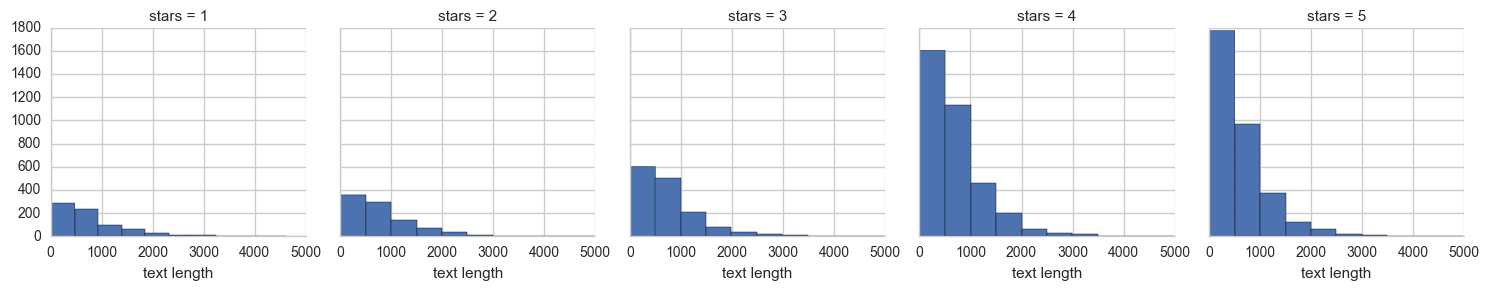

In [23]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

Visualizing the counts for each rating type. 

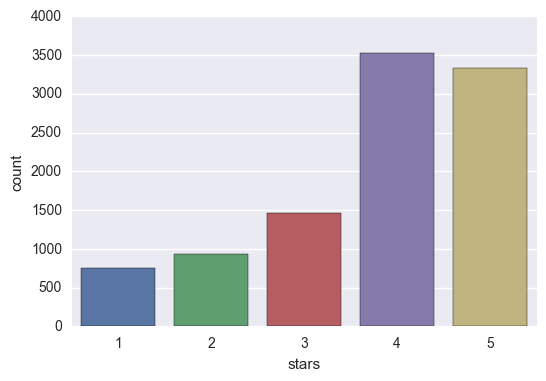

In [11]:
sns.countplot(x='stars',data=yelp)

Grouping the reviews on the basis of the stars.

In [15]:
stars =  yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


Let's check out the correlation between different features for the reviews.

In [16]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


And visualize this correlation:

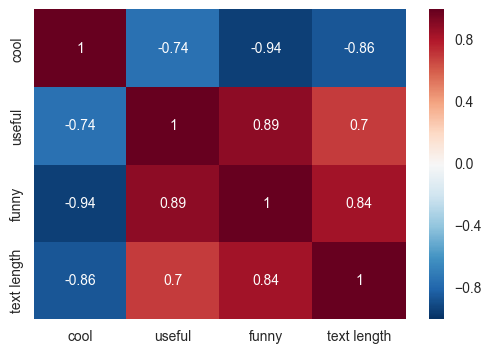

In [17]:
sns.heatmap(stars.corr(),annot=True)

## NLP Classification

Moving on to the actual task: we'll just grab the reviews that were either 1 star or 5 stars, to make life easier in this micro-project.

In [18]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5) ]

In [19]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
business_id    4086 non-null object
date           4086 non-null object
review_id      4086 non-null object
stars          4086 non-null int64
text           4086 non-null object
type           4086 non-null object
user_id        4086 non-null object
cool           4086 non-null int64
useful         4086 non-null int64
funny          4086 non-null int64
text length    4086 non-null int64
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


Our data will be the text content of the reviews, and we'll try to predict if it's a 1 star or a 5 star review. So let's assign those to our X and y variables.

In [21]:
X = yelp_class['text']
y = yelp_class['stars']

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [23]:
X = cv.fit_transform(X)

### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [26]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

In [27]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Predictions and Evaluations

In [28]:
preds = nb.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [46]:
from sklearn.metrics import confusion_matrix,classification_report

In [49]:
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[159  69]
 [ 22 976]]
             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226

